<a href="https://colab.research.google.com/github/sebastianDeLeon/ConvulsionalNetwork/blob/main/redConvolucional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
datos, metadatos = tfds.load('mnist', as_supervised=True, with_info=True)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
print(datos)

{'test': <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>, 'train': <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}


In [ ]:
datos_train = datos['train']
datos_pru = datos['test']

In [ ]:
nombres_clases = metadatos.features['label'].names

In [ ]:
datos_pru

<_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
#Normalizacion
# transformar de una escala de 0-255 a 0-1

def normalizacion(imagenes, etiquetas):
  imagenes = tf.cast(imagenes,tf.float32)
  imagenes = imagenes/255
  return imagenes, etiquetas

datos_train = datos_train.map(normalizacion)
datos_pru = datos_pru.map(normalizacion)

#agregar cahe

datos_train = datos_train.cache()
datos_pru = datos_pru.cache()

In [ ]:
import matplotlib.pyplot as plt

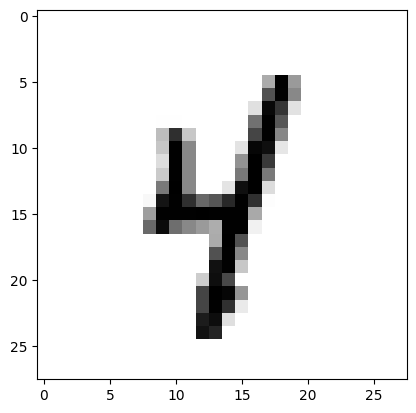

In [ ]:
'''for i, (imagenen, etiqueta) in enumerate(datos_train.take(1)):
  break'''
for imagen, etiqueta in datos_train.take(1):
  break

plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)

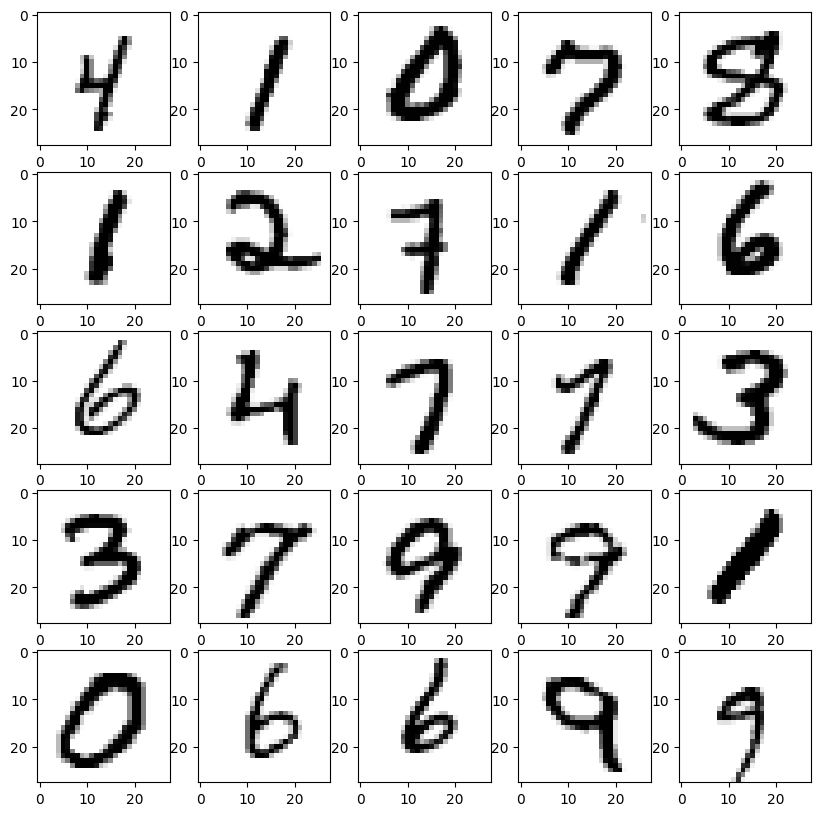

In [ ]:
'''for i, (imagenen, etiqueta) in enumerate(datos_train.take(1)):
  break'''
plt.figure(figsize=(10,10))
for i, (imagen, etiqueta) in enumerate(datos_train.take(25)):
  plt.subplot(5,5,i+1)
  plt.imshow(imagen, cmap=plt.cm.binary)

plt.show()

In [ ]:
'''modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)), #El uno es por estar en blanco y negro
    #capa oculta
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    #capa de salida
    tf.keras.layers.Dense(10, activation=tf.nn.softmax),
  ])'''

modelo = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),

  ])

In [ ]:
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
TAMANO_LOTE = 32

datos_train = datos_train.repeat().shuffle(60000).batch(TAMANO_LOTE)
datos_pru = datos_pru.batch(TAMANO_LOTE)

In [ ]:
import math

entrenamiento = modelo.fit(
    datos_train, epochs=10,
    steps_per_epoch=math.ceil(60000/TAMANO_LOTE)
    )

Epoch 1/10
1875/1875 [==============================] - 16s 3ms/step - loss: 0.1351 - accuracy: 0.9585
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0399 - accuracy: 0.9873
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0300 - accuracy: 0.9907
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0208 - accuracy: 0.9932
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0156 - accuracy: 0.9951
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0136 - accuracy: 0.9958
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0094 - accuracy: 0.9970
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0085 - accuracy: 0.9973
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0068 - accuracy: 0.9978
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.00

1/1 [==============================] - 0s 103ms/step


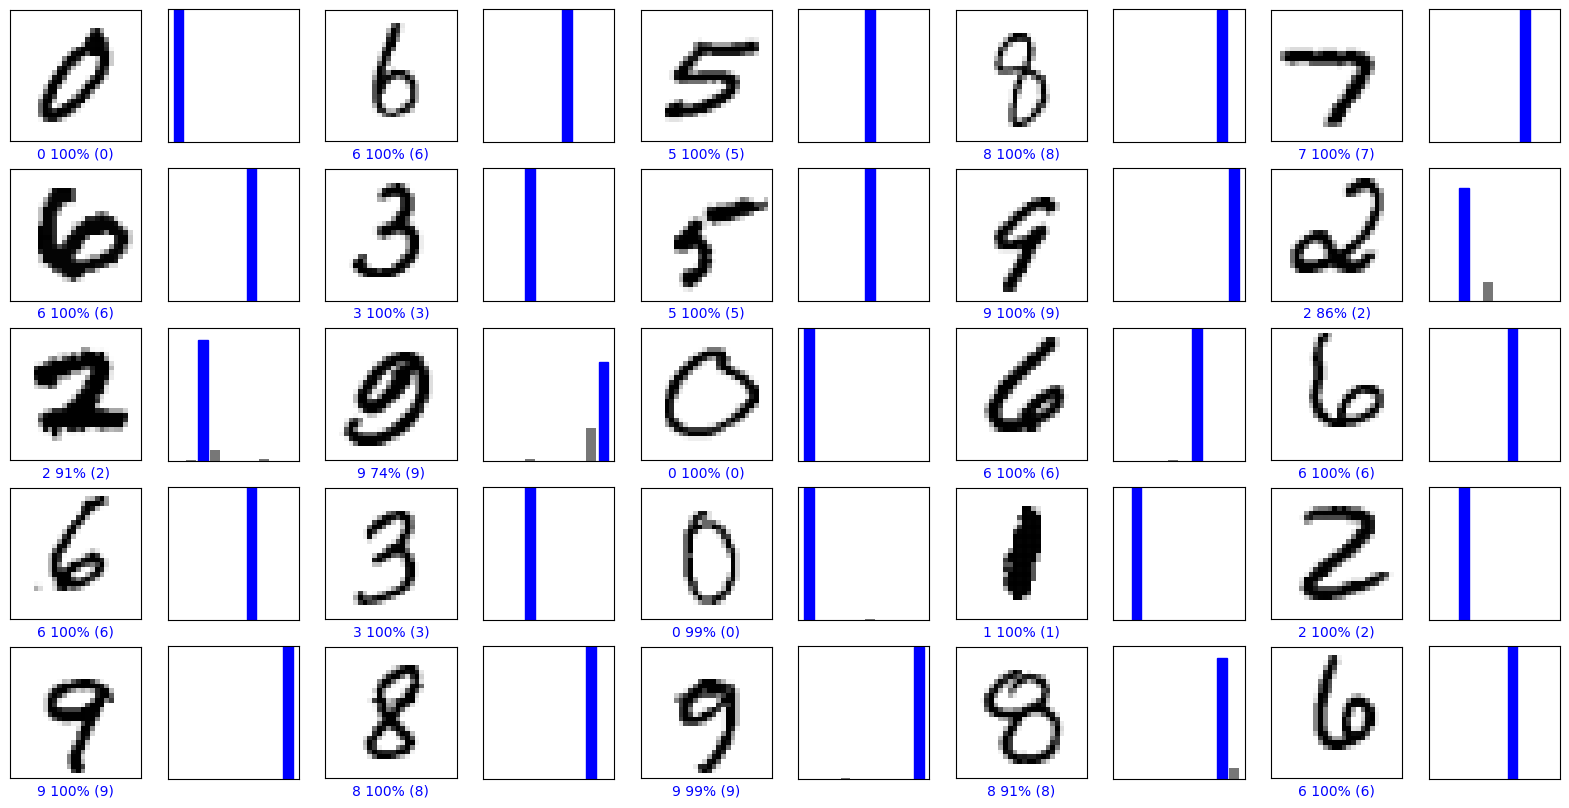

In [ ]:
'''#Pintar una cuadricula con varias predicciones, y marcar si fue correcta (azul) o incorrecta (roja)
import numpy as np

for imagenes_prueba, etiquetas_prueba in datos_train.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)

def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
  arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap=plt.cm.binary)

  etiqueta_prediccion = np.argmax(arr_predicciones)
  if etiqueta_prediccion == etiqueta_real:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(nombres_clases[etiqueta_prediccion],
                                100*np.max(arr_predicciones),
                                nombres_clases[etiqueta_real]),
                                color=color)

def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
  arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  grafica = plt.bar(range(10), arr_predicciones, color="#777777")
  plt.ylim([0, 1])
  etiqueta_prediccion = np.argmax(arr_predicciones)

  grafica[etiqueta_prediccion].set_color('red')
  grafica[etiqueta_real].set_color('blue')

filas = 5
columnas = 5
num_imagenes = filas*columnas
plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(num_imagenes):
  plt.subplot(filas, 2*columnas, 2*i+1)
  graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(filas, 2*columnas, 2*i+2)
  graficar_valor_arreglo(i, predicciones, etiquetas_prueba)'''

In [ ]:
datos, metadatos = tfds.load('cats_vs_dogs', as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.1.incomplete0T45EW/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [ ]:
datos_train = datos['train']

In [ ]:
#tfds.show_examples(datos_train, metadatos)

In [ ]:
datos_train.cache()

<CacheDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

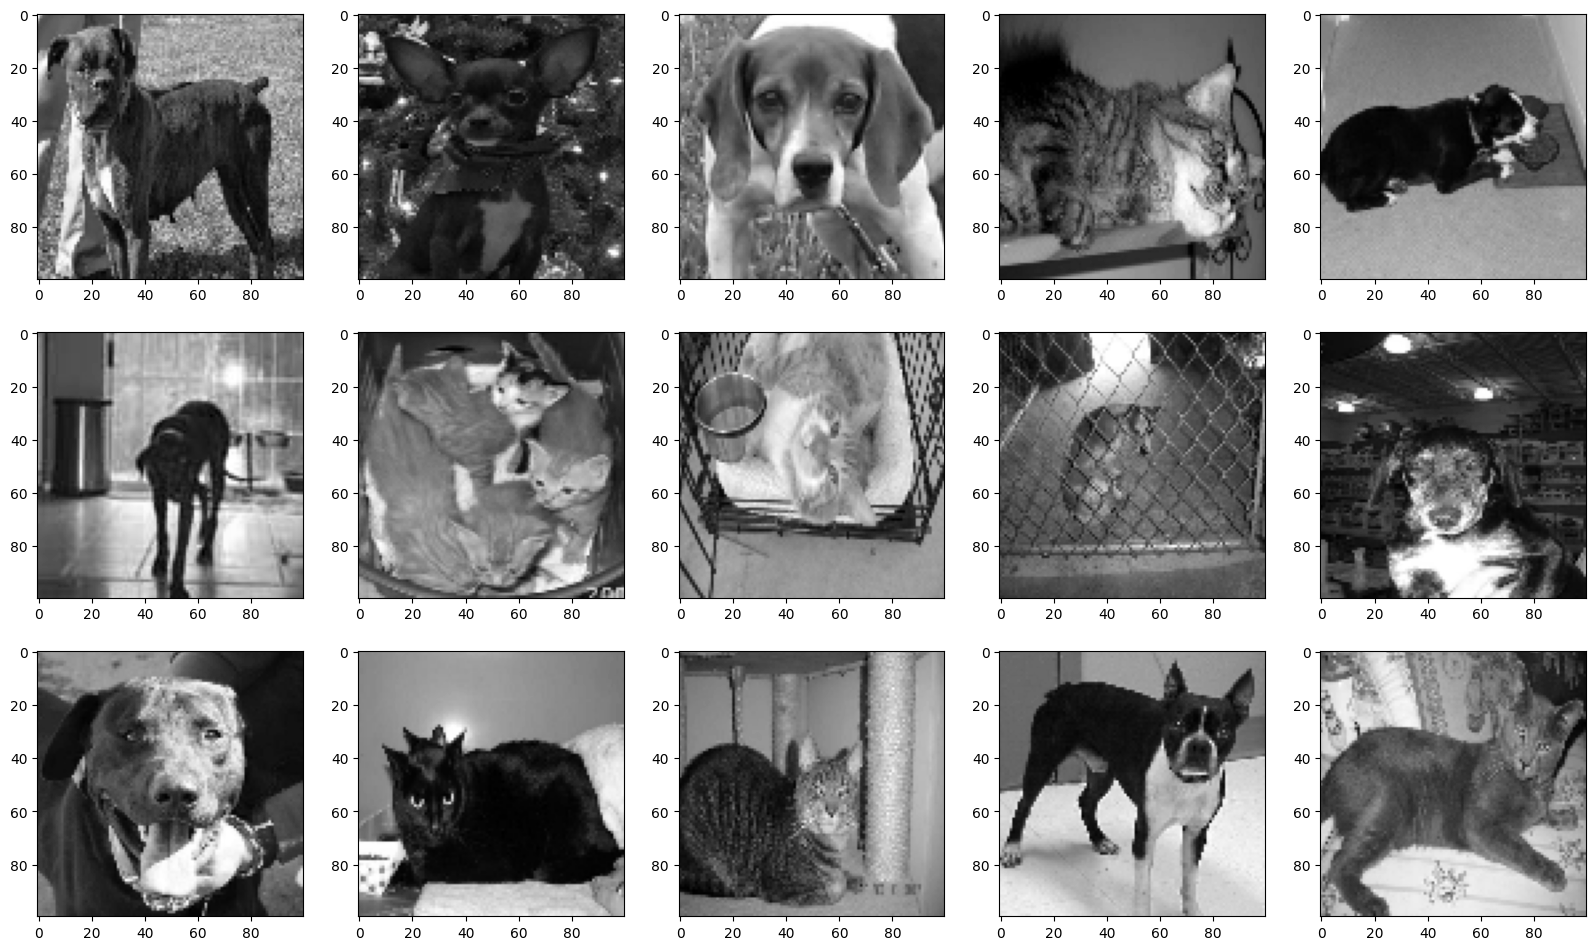

In [ ]:
import matplotlib.pyplot as plt
import cv2

plt.figure(figsize=(20,20))

TAMANO_IMG=100

for i, (imagen, etiqueta) in enumerate(datos_train.take(15)):
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG,TAMANO_IMG))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  plt.subplot(5, 5, i+1)
  plt.imshow(imagen, cmap='gray')



In [ ]:
datos_entrenamiento=[]

In [ ]:
for i, (imagen, etiqueta) in enumerate(datos_train):
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG,TAMANO_IMG))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  imagen = imagen.reshape(TAMANO_IMG,TAMANO_IMG,1)
  datos_entrenamiento.append([imagen,etiqueta])

In [ ]:
len(datos_entrenamiento)

23262

In [ ]:
X=[]

y=[]

for imagen, etiqueta in datos_entrenamiento:
  X.append(imagen)
  y.append(etiqueta)

In [ ]:
#normalizar imagenes para que en lugar de 1 a 255 colores
#se comprima de 0 a 1
import numpy as np

X = np.array(X).astype(float) / 255

In [ ]:
X

In [ ]:
y

array([1, 1, 1, ..., 0, 1, 0])

In [ ]:
y = np.array(y)

In [ ]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(100, 100, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, 'relu'),
    tf.keras.layers.Dense(1, 'sigmoid'),
])

In [ ]:
modelo.compile(
    optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']
)

In [ ]:
modelo.fit(
    X, y, batch_size=32, validation_split=0.15, epochs=50
)

Epoch 1/50
618/618 [==============================] - 15s 15ms/step - loss: 0.6126 - accuracy: 0.6561 - val_loss: 0.5204 - val_accuracy: 0.7461
Epoch 2/50
618/618 [==============================] - 7s 12ms/step - loss: 0.4758 - accuracy: 0.7727 - val_loss: 0.4543 - val_accuracy: 0.7854
Epoch 3/50
618/618 [==============================] - 7s 12ms/step - loss: 0.4070 - accuracy: 0.8129 - val_loss: 0.4337 - val_accuracy: 0.8100
Epoch 4/50
618/618 [==============================] - 8s 12ms/step - loss: 0.3540 - accuracy: 0.8414 - val_loss: 0.3905 - val_accuracy: 0.8281
Epoch 5/50
618/618 [==============================] - 7s 12ms/step - loss: 0.2996 - accuracy: 0.8700 - val_loss: 0.3826 - val_accuracy: 0.8289
Epoch 6/50
618/618 [==============================] - 8s 12ms/step - loss: 0.2422 - accuracy: 0.8981 - val_loss: 0.4195 - val_accuracy: 0.8281
Epoch 7/50
618/618 [==============================] - 7s 12ms/step - loss: 0.1923 - accuracy: 0.9226 - val_loss: 0.4025 - val_accuracy: 0.833